In [1]:
!pip install pandas matplotlib seaborn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('../dataset/netflix_titles.csv')

# Show first 5 rows of the dataset
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# 🧼 Clean the Data 
df.drop_duplicates(inplace=True)
df.dropna(subset=['type', 'country', 'release_year', 'listed_in'], inplace=True)

df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')


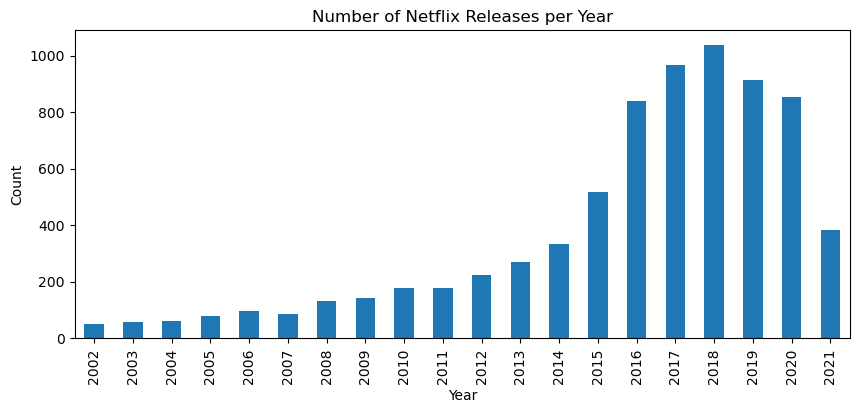

In [8]:
plt.figure(figsize=(10,4))
df['release_year'].value_counts().head(20).sort_index().plot(kind='bar')
plt.title('Number of Netflix Releases per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


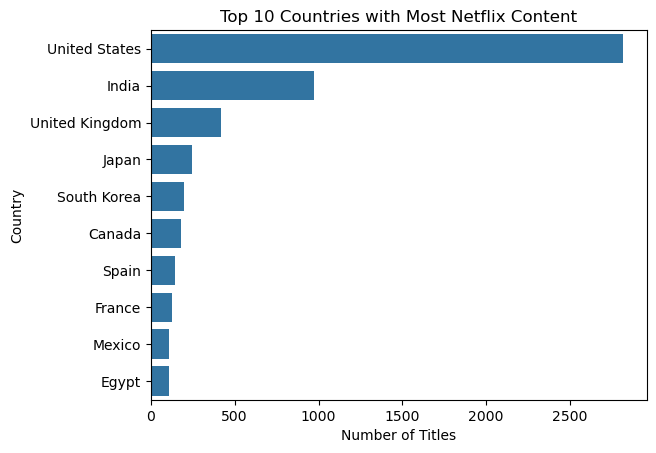

In [9]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


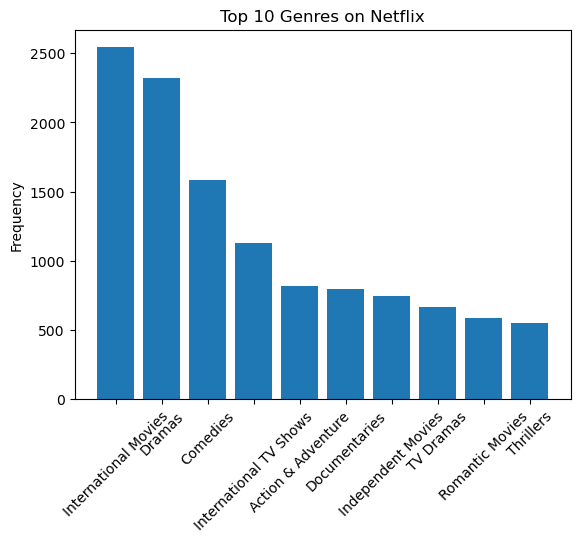

In [10]:
from collections import Counter

# Split and count genres
genres = ','.join(df['listed_in']).split(',')
genre_count = Counter([g.strip() for g in genres])
top_genres = dict(sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot
plt.bar(top_genres.keys(), top_genres.values())
plt.xticks(rotation=45)
plt.title('Top 10 Genres on Netflix')
plt.ylabel('Frequency')
plt.show()


In [11]:
plt.savefig('../images/country_chart.png')


<Figure size 640x480 with 0 Axes>